In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn')

from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.

import os
for dirname, _, filenames in os.walk('https://www.kaggle.com/henriqueyamahata/bank-marketing'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [10]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('ml-bank').getOrCreate()
sdf = spark.read.csv('C:/Users/ITD-STU/Desktop/Semester8/BigData/proyek/data/bankadditionalfull.csv', header = True, inferSchema = True)
sdf.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp.var.rate: double (nullable = true)
 |-- cons.price.idx: double (nullable = true)
 |-- cons.conf.idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr.employed: double (nullable = true)
 |-- y: string (nullable = true)



In [11]:
sdf = sdf.withColumnRenamed("emp.var.rate","emp_var_rate")
sdf = sdf.withColumnRenamed("cons.price.idx","cons_price_idx")
sdf = sdf.withColumnRenamed("cons.conf.idx","cons_conf_idx")
sdf = sdf.withColumnRenamed("nr.employed","nr_employed")

In [12]:
sdf.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: string (nullable = true)



In [13]:
sdf.count()

41188

In [14]:
sdf.toPandas().groupby(['y']).size()

y
no     36548
yes     4640
dtype: int64

In [15]:
numeric_features = [t[0] for t in sdf.dtypes if t[1] == 'int']
sdf.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,41188,40.02406040594348,10.421249980934057,17,98
duration,41188,258.2850101971448,259.279248836465,0,4918
campaign,41188,2.567592502670681,2.7700135429023245,1,56
pdays,41188,962.4754540157328,186.91090734474085,0,999
previous,41188,0.17296299893172767,0.4949010798392899,0,7


C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plottin

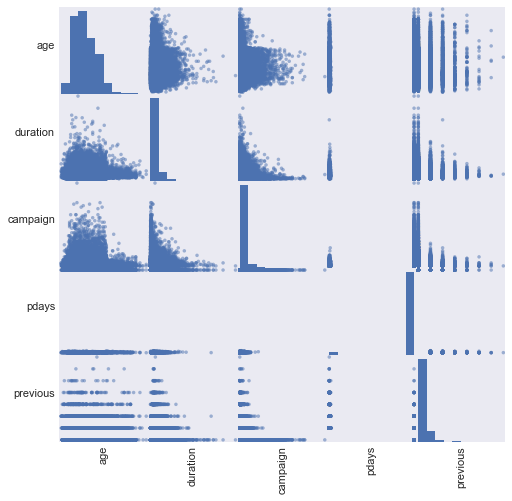

In [16]:
import pandas as pd
numeric_data = sdf.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)

for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [17]:
sdf = sdf.select(
    'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 
    'contact', 'duration', 'campaign', 'pdays', 'poutcome', 'emp_var_rate',
    'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'
)
cols = sdf.columns
sdf.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: string (nullable = true)



## Prepare Dataset for Machine Learning

In [18]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

stages = []
categoricalColumns = [
    'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome'
]

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(
        inputCols=[stringIndexer.getOutputCol()], 
        outputCols=[categoricalCol + "classVec"]
    )
    stages += [stringIndexer, encoder]
    
label_stringIdx = StringIndexer(inputCol = 'y', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['age', 'duration', 'campaign', 'pdays', 'emp_var_rate', 'cons_price_idx', 
               'cons_conf_idx', 'euribor3m', 'nr_employed']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [19]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(sdf)
sdf = pipelineModel.transform(sdf)
selectedCols = ['label', 'features'] + cols
sdf = sdf.select(selectedCols)
sdf.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: string (nullable = true)



In [20]:
pdf = pd.DataFrame(sdf.take(5), columns=sdf.columns)
pdf.iloc[:,0:2]

,label,features
0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
1,0.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,0.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [21]:
len(pdf.features[0])

39

In [22]:
train, test = sdf.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 28839
Test Dataset Count: 12349


## Decision Tree Model

In [23]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
dtPreds = dtModel.transform(test)
dtPreds.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+------+-----+---------------+----------+--------------------+
|age|   job|label|  rawPrediction|prediction|         probability|
+---+------+-----+---------------+----------+--------------------+
| 24|admin.|  0.0|[22175.0,589.0]|       0.0|[0.97412581268669...|
| 28|admin.|  0.0|[22175.0,589.0]|       0.0|[0.97412581268669...|
| 28|admin.|  0.0|[22175.0,589.0]|       0.0|[0.97412581268669...|
| 29|admin.|  0.0|[22175.0,589.0]|       0.0|[0.97412581268669...|
| 29|admin.|  0.0|[22175.0,589.0]|       0.0|[0.97412581268669...|
| 29|admin.|  0.0|[22175.0,589.0]|       0.0|[0.97412581268669...|
| 29|admin.|  0.0|[22175.0,589.0]|       0.0|[0.97412581268669...|
| 30|admin.|  0.0|[22175.0,589.0]|       0.0|[0.97412581268669...|
| 30|admin.|  0.0|[22175.0,589.0]|       0.0|[0.97412581268669...|
| 30|admin.|  0.0|[22175.0,589.0]|       0.0|[0.97412581268669...|
+---+------+-----+---------------+----------+--------------------+
only showing top 10 rows



In [26]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

Evaluate Decision Tree Model

In [28]:
dtEval = BinaryClassificationEvaluator()
dtROC = dtEval.evaluate(dtPreds, {dtEval.metricName: "areaUnderROC"})
print("Test Area Under ROC: " + str(dtROC))

Test Area Under ROC: 0.53066816293248


## Gradient Boosting Model

In [29]:
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
gbtPreds = gbtModel.transform(test)
gbtPreds.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+------+-----+--------------------+----------+--------------------+
|age|   job|label|       rawPrediction|prediction|         probability|
+---+------+-----+--------------------+----------+--------------------+
| 24|admin.|  0.0|[1.31299984281290...|       0.0|[0.93251624598138...|
| 28|admin.|  0.0|[0.84637216053810...|       0.0|[0.84458472395652...|
| 28|admin.|  0.0|[0.77004355376477...|       0.0|[0.82347738773544...|
| 29|admin.|  0.0|[1.31299984281290...|       0.0|[0.93251624598138...|
| 29|admin.|  0.0|[1.31299984281290...|       0.0|[0.93251624598138...|
| 29|admin.|  0.0|[1.27946972794683...|       0.0|[0.92817178450192...|
| 29|admin.|  0.0|[1.31299984281290...|       0.0|[0.93251624598138...|
| 30|admin.|  0.0|[1.31299984281290...|       0.0|[0.93251624598138...|
| 30|admin.|  0.0|[1.31299984281290...|       0.0|[0.93251624598138...|
| 30|admin.|  0.0|[1.31299984281290...|       0.0|[0.93251624598138...|
+---+------+-----+--------------------+----------+--------------

Evaluate Gradient Boosting Model

In [30]:
gbtEval = BinaryClassificationEvaluator()
gbtROC = gbtEval.evaluate(gbtPreds, {gbtEval.metricName: "areaUnderROC"})
print("Test Area Under ROC: " + str(gbtROC))

Test Area Under ROC: 0.9392365703622118
